# House Price Prediction

## Dataset Description
The dataset is retrieved from Kaggle (https://www.kaggle.com/harlfoxem/housesalesprediction)
1. Id: Unique ID for each home sold
2. Date: Date of the home sale
3. Price: Price of each home sold (target)
4. Bedrooms: Number of bedrooms
5. Bathrooms: Number of bathrooms, where .5 accounts for a room with a toilet but no shower
6. Sqft_living: Square footage of the apartments interior living space
7. Sqft_lot: Square footage of the land space
8. Floors: Number of floors
9. Waterfront: A dummy variable for whether the apartment was overlooking the waterfront or not 10.View: An index from 0 to 4 of how good the view of  the property was 11.Condition: An index from 1 to 5 on the condition of the apartment,
10. Grade: An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design
11. Sqft_above: The square footage of the interior housing space that is above ground level
12. Sqft_basement: The square footage of the interior housing space that is below ground level
13. Yr_built: The year the house was initially built
14. Yr_renovated: The year of the house’s last renovation
15. Zipcode: What zipcode area the house is in
16. Lat: Lattitude
17. Long: Longitude
18. Sqft_living15: The square footage of interior housing living space for the nearest 15 neighbors
29. Sqft_lot15: The square footage of the land lots of the nearest 15 neighbors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

In [2]:
# Load and prepare the data
data = pd.read_csv("C:/Users/ayana/OneDrive/Bureau/projects/Predicting House Prices/kc_house_data.csv")
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
data['year_sold'] = pd.to_datetime(data['date']).dt.date.astype('datetime64[ns]')
data['year_sold'] = pd.DatetimeIndex(data['year_sold']).year # extract only year

In [5]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year_sold        0
dtype: int64

In [6]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,...,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,2014.322954
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,...,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.467616
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,2014.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,2014.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,...,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000


In [7]:
data = data.drop(['id', 'date'], axis=1)

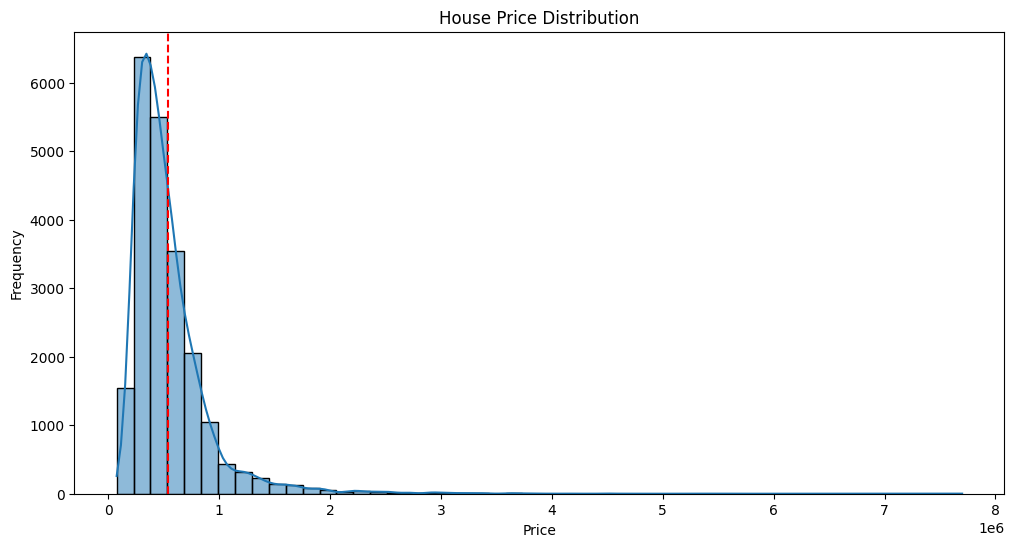

In [9]:
# Visualization: Price distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['price'], bins=50, kde=True)
plt.title('House Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.axvline(data['price'].mean(), color='r', linestyle='--', label='Mean') 
plt.show()

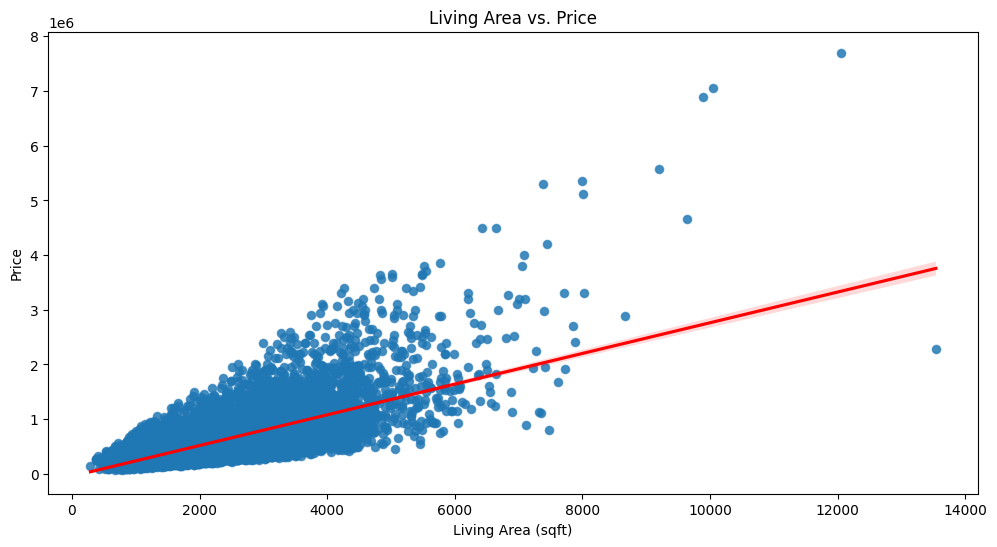

In [10]:
# Visualization: Living area vs. Price
plt.figure(figsize=(12, 6))
sns.scatterplot(x='sqft_living', y='price', data=data, alpha=0.6)
sns.regplot(x='sqft_living', y='price', data=data, scatter_kws={'alpha':0.6}, line_kws={'color': 'red'})
plt.title('Living Area vs. Price')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price')
plt.show()

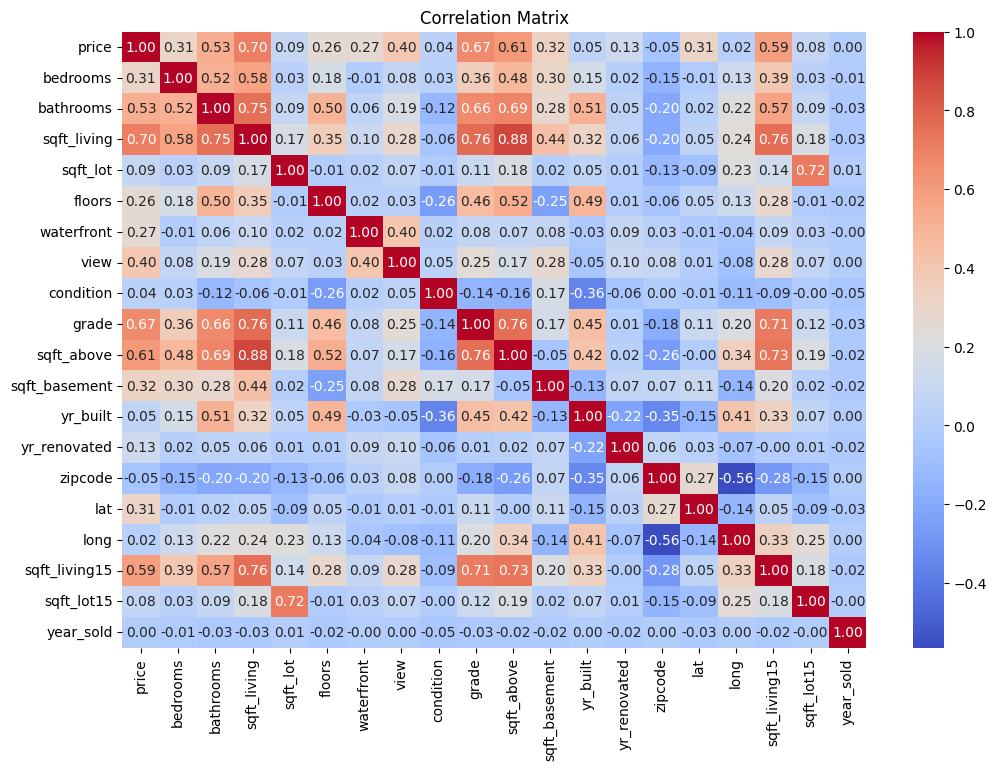

In [11]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [12]:
# Prepare data for the model
y = data['price']
X = data.drop('price', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [15]:
# Define models and hyperparameters
models = {
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {}
    },
    'Random Forest': {
        'model': RandomForestRegressor(),
        'params': {'n_estimators': [100, 200], 'max_depth': [None, 10]}
    },
    'XGBoost': {
        'model': XGBRegressor(),
        'params': {'learning_rate': [0.01, 0.1], 'max_depth': [3, 5], 'n_estimators': [100, 200]}
    },
    'Gradient Boosting': {
        'model': GradientBoostingRegressor(),
        'params': {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 5]}
    }
}

In [16]:
# Training and evaluation
def train_and_evaluate(models):
    results = []
    for name, config in models.items():
        gs = GridSearchCV(config['model'], config['params'], cv=5, n_jobs=-1, scoring='r2')
        gs.fit(X_train, y_train)
        best_model = gs.best_estimator_
        y_pred = best_model.predict(X_test)
        metrics = {
            'Model': name,
            'Best Parameters': gs.best_params_,
            'R²': r2_score(y_test, y_pred),
            'MSE': mean_squared_error(y_test, y_pred),
            'MAE': mean_absolute_error(y_test, y_pred),
        }
        results.append(metrics)
    return pd.DataFrame(results).sort_values(by='R²', ascending=False)

results_df = train_and_evaluate(models)
print(results_df)

               Model                                    Best Parameters  \
2            XGBoost  {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...   
3  Gradient Boosting  {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...   
1      Random Forest           {'max_depth': None, 'n_estimators': 100}   
0  Linear Regression                                                 {}   

         R²           MSE            MAE  
2  0.878562  1.835854e+10   68518.939963  
3  0.871724  1.939239e+10   69592.274283  
1  0.858130  2.144737e+10   71910.184590  
0  0.702567  4.496490e+10  126914.291540  


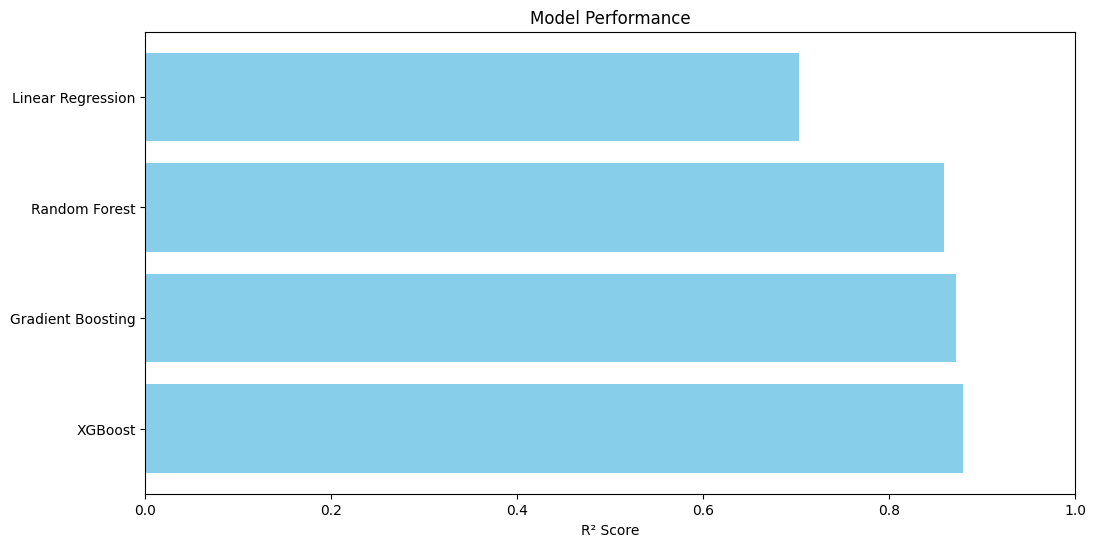

In [17]:
# Visualization of model performance
plt.figure(figsize=(12, 6))
plt.barh(results_df['Model'], results_df['R²'], color='skyblue')
plt.xlabel('R² Score')
plt.title('Model Performance')
plt.xlim(0, 1)
plt.show()

In [19]:
# Example prediction
sample_house = np.array(X_test[0]).reshape(1, -1)
predicted_price = models['XGBoost']['model'].fit(X_train, y_train).predict(sample_house)
print(f'Predicted price for the house: {predicted_price[0]:,.2f} USD')

Predicted price for the house: 383,931.31 USD
